<img src="../img/Logo.png" width="300">

# Ejercicio
## Aprendizaje de imágenes - Ejercicio de reconocimiento facial

### Profesor: Jorge Calvo

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2025-02-16 19:12:41.691670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739729561.710447   33806 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739729561.716134   33806 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-16 19:12:41.734010: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Descarga de datos 
* **fetch_lfw_people** <br>
Este conjunto de datos es una colección de imágenes JPEG de personajes famosos recopiladas a través de Internet; todos los detalles están disponibles en el sitio web oficial:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [2]:
Data = fetch_lfw_people(color=True, min_faces_per_person=3,resize=0.6)

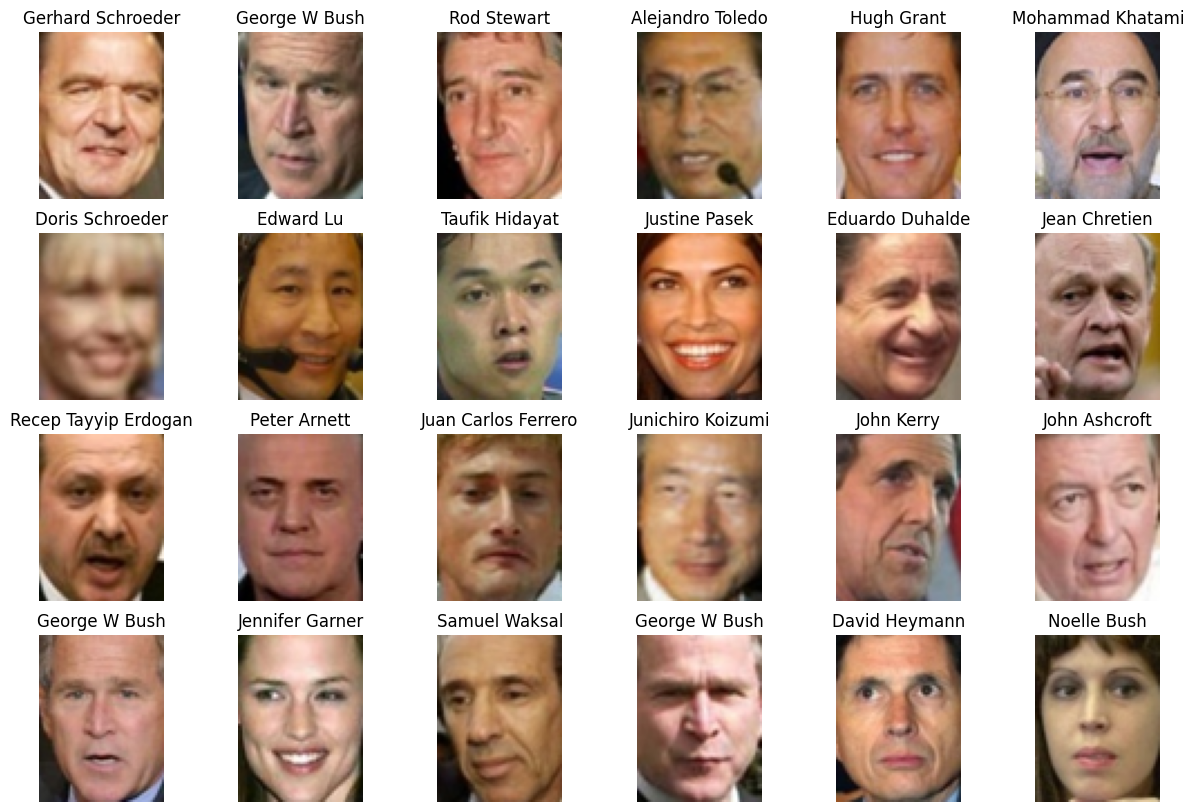

In [3]:
#Visualización de los datos
from IPython.core.pylabtools import figsize

fig, ax = plt.subplots(4, 6, figsize=(15,10))
for i, axi in enumerate(ax.flat):
    axi.set_title(Data.target_names[Data.target[i]])
    axi.axis("off")
    axi.imshow(Data.images[i])

In [4]:
Data.images.shape

(7606, 75, 56, 3)

In [5]:
# Obtener las imágenes y los targets
images = Data.images
targets = Data.target

print(images.shape)

# Obtener el número de clases y de imágenes
n_classes = len(Data.target_names)

# Convertir las imágenes a arrays de tipo float32 y normalizar entre 0 y 1
images = images.astype('float32') / 255.0

print(targets)

(7606, 75, 56, 3)
[280 278 737 ... 111 900 857]


### Dividir los datos en entrenamiento y validación
La librería **train_test_split** en Python, específicamente en la librería scikit-learn, proporciona una funcionalidad conveniente para dividir un conjunto de datos en conjuntos de entrenamiento y prueba de manera aleatoria.

La función train_test_split se utiliza comúnmente en el ámbito del aprendizaje automático (machine learning) para dividir los datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático, mientras que el conjunto de prueba se utiliza para evaluar el rendimiento del modelo una vez entrenado.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Donde **X** representa las características de los datos y **y** representa las etiquetas o variables objetivo asociadas. **test_size** es el porcentaje de datos que se utilizarán para el conjunto de prueba (por ejemplo, 0.2 para un 20% de los datos) y **random_state** es una semilla que se utiliza para reproducir los resultados.

In [6]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=42)